In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from pathlib import Path # do pracy z plikami

In [2]:
nodes_path = Path('nodes1.txt').resolve()
edges_path = Path('edges.txt').resolve()

In [3]:
with open(nodes_path, 'r') as f:
    nodes_list = f.read().splitlines()

with open(edges_path, 'r') as f:
    rows = f.read().splitlines()
# jedna krawedz ma wygladac tak (N1,N2)
edges = []
for row in rows:
    e = row.split(' ')
    edge1 = int(e[0])
    edge2 = int(e[1])
    edges.append((edge1, edge2))

#print(edges)
len(nodes_list) 
max_num_in_edges = max([max(e) for e in edges])
max_num_in_edges == len(nodes_list) 

True

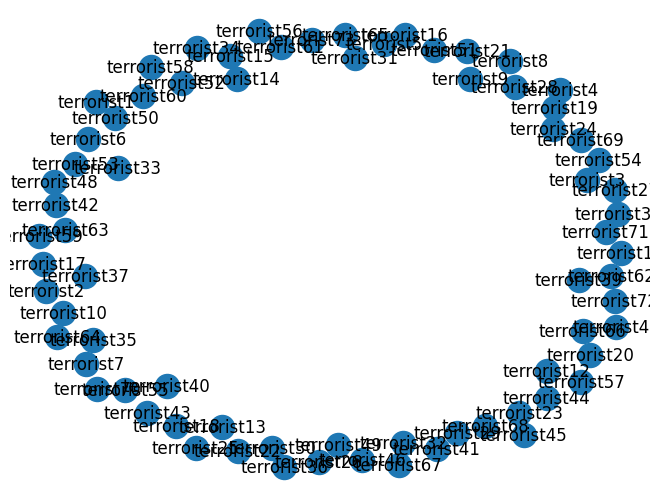

In [4]:
G = nx.Graph() # undirected graph
for i, node in enumerate(nodes_list): # w edges.txt numery ida od jedynki
    G.add_node(i+1, label=node)
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'))

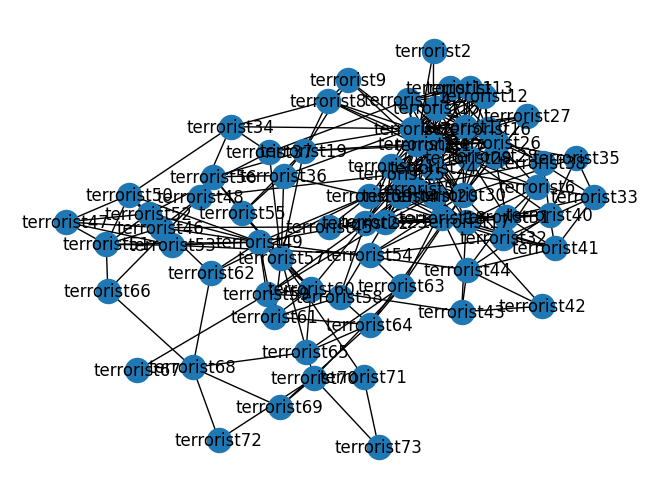

In [5]:
G.add_edges_from(edges)
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'))

# https://towardsdatascience.com/customizing-networkx-graphs-f80b4e69bedf

In [6]:
G.nodes(0)

NodeDataView({1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None, 25: None, 26: None, 27: None, 28: None, 29: None, 30: None, 31: None, 32: None, 33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 48: None, 49: None, 50: None, 51: None, 52: None, 53: None, 54: None, 55: None, 56: None, 57: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 65: None, 66: None, 67: None, 68: None, 69: None, 70: None, 71: None, 72: None, 73: None}, data=0)

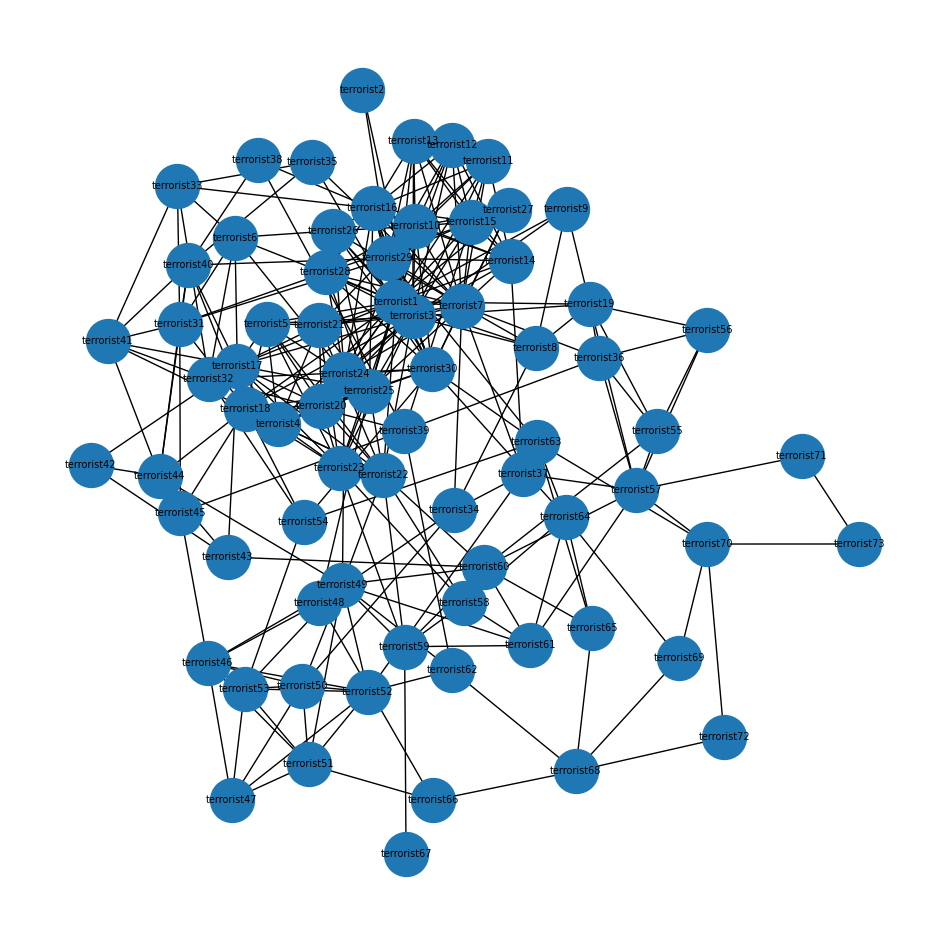

In [7]:

fig, ax = plt.subplots(figsize=(12,12))
pos = nx.kamada_kawai_layout(G)
#pos = nx.layo
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'), ax=ax, pos = pos, node_size=1000, font_size=7)

## Na kolejne zajęcia
##### - Jakie info można uzyskać z sieci naszej
##### - Jaki narzedzia mozna uzyc
##### - np. Ile osob potrzeba zeby zkomunikowac sie miedzy 2 nodami(siec spolecznosciowa)
##### - zeby to oszacowac potrzebujemy srednicy grafu/sieci
##### - Jakieś proste info ale też jakieś bardziej złożone mogą być
##### - Jakie jest znaczenie dziedzinowe/praktyczne dla naszego obiektu
##### - pomysły co możemy zbadać i  w jaki sposób !!!
##### - np. czym jest średnica z praktycznego punktu widzenia w sieci

 


In [8]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73))

In [9]:
node = G.nodes[1]
node['label']

'terrorist1'

### Analiza k-rdzeni

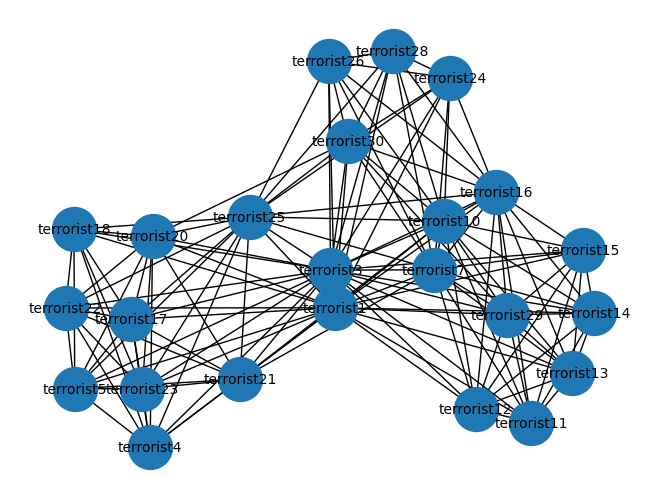

In [10]:

k_cores = nx.k_core(G, k=9)
nx.draw(k_cores, with_labels=True, labels=nx.get_node_attributes(k_cores, 'label'), node_size=1000, font_size=10)


# Kliki

In [11]:
# kliki
clicks = nx.find_cliques(G)
clicks = list(clicks)
#zeby nie bylo kilk z 2 elemntami
clicks = [sorted(click) for click in clicks if len(click) > 2]
clicks = [click for click in clicks if len(click) == max([len(click) for click in clicks])]
clicks

print(f'Kliki terrorystów:')
for click in clicks:
    names = [G.nodes[node]['label'] for node in click]
    print(f'klika: {names}')

Kliki terrorystów:
klika: ['terrorist1', 'terrorist3', 'terrorist7', 'terrorist10', 'terrorist11', 'terrorist12', 'terrorist13', 'terrorist14', 'terrorist15', 'terrorist16', 'terrorist29']


# Terrorysci z najwieksza liczba polaczen


In [12]:


def TERRORISTS(G: nx.Graph, n: int) -> list:
  degrees = nx.degree(G)
  # bierze kazzdy element z listy i sortuje po drugim elemencie i odwraca
  degrees = sorted(degrees, key=lambda x: x[1], reverse=True)
  # degree[0] - index wierzcholka, degree[1] - stopien wierzcholka
  degrees = [(G.nodes[degree[0]]['label'],degree[1]) for degree in degrees]
  return degrees[:n] # [0:n] == [:n]
print(f"Terroryści z największą liczbą połączeń, szefowie gangów:")
TERRORISTS(G,5)

Terroryści z największą liczbą połączeń, szefowie gangów:


[('terrorist1', 29),
 ('terrorist3', 27),
 ('terrorist7', 22),
 ('terrorist10', 18),
 ('terrorist25', 18)]

In [13]:
nx.average_clustering(G)

0.4595164809431669

In [14]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73))

# Najkrósze siecizki


In [15]:
nx.shortest_path(G, source=1, target=73)

[1, 19, 57, 70, 73]

# Stopnie

In [17]:
nx.degree(G, 2)

2

In [19]:
nx.degree(G, 1)

29

# Średni stopień

In [20]:
G.degree()

DegreeView({1: 29, 2: 2, 3: 27, 4: 10, 5: 10, 6: 7, 7: 22, 8: 6, 9: 4, 10: 18, 11: 10, 12: 10, 13: 10, 14: 11, 15: 11, 16: 16, 17: 15, 18: 15, 19: 8, 20: 11, 21: 11, 22: 14, 23: 12, 24: 11, 25: 18, 26: 10, 27: 5, 28: 11, 29: 14, 30: 17, 31: 9, 32: 6, 33: 6, 34: 5, 35: 4, 36: 6, 37: 5, 38: 3, 39: 6, 40: 8, 41: 7, 42: 3, 43: 4, 44: 7, 45: 4, 46: 8, 47: 5, 48: 4, 49: 12, 50: 7, 51: 7, 52: 8, 53: 7, 54: 5, 55: 5, 56: 4, 57: 9, 58: 5, 59: 7, 60: 8, 61: 6, 62: 4, 63: 6, 64: 6, 65: 4, 66: 3, 67: 1, 68: 5, 69: 3, 70: 5, 71: 2, 72: 2, 73: 2})

In [21]:
degree = G.degree()

degree_list = []

for (n,d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)

print('The average degree is ' + str(av_degree))

The average degree is 8.32876712328767


Text(0.5, 1.0, 'Stopień wierzchołka')

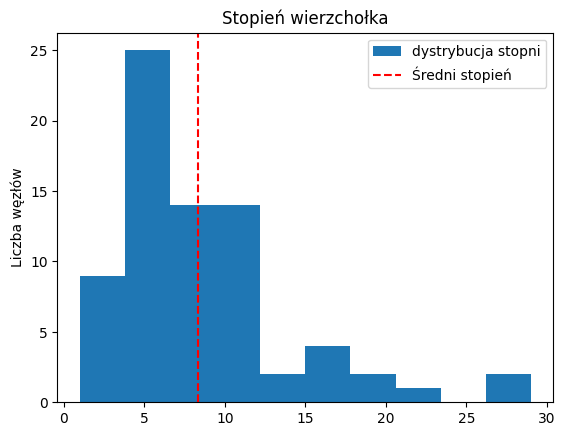

In [22]:
plt.hist(degree_list,label='dystrybucja stopni')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Średni stopień')
plt.legend()
plt.ylabel('Liczba węzłów')
plt.title('Stopień wierzchołka')


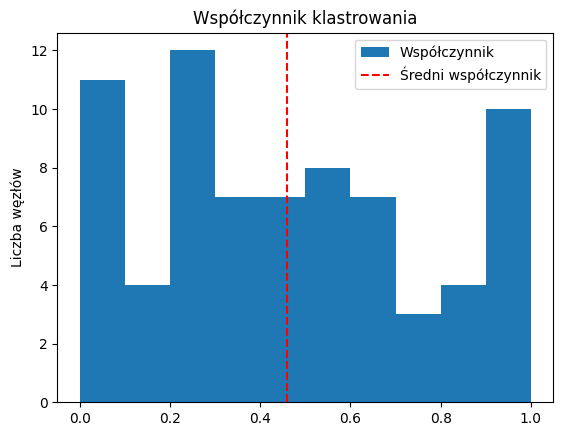

In [23]:

local_clustering_coefficient = nx.algorithms.cluster.clustering(G)


av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)


plt.hist(local_clustering_coefficient.values(),label='Współczynnik')
plt.axvline(av_local_clustering_coefficient,color='r',linestyle='dashed',label='Średni współczynnik')
plt.legend()
plt.ylabel('Liczba węzłów')
plt.title('Współczynnik klastrowania')
plt.show()

In [24]:
nx.average_shortest_path_length(G)

2.59703196347032

In [25]:
nx.has_path(G, source=1, target=60)

True

# Średnica

In [26]:
nx.diameter(G)

5

# Usuwanie wierzchołków i jak to wpływa

In [27]:
G.remove_node(1)

In [28]:
G.remove_node(3)

In [29]:
G.remove_node(7)

In [30]:
G.nodes()

NodeView((2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73))

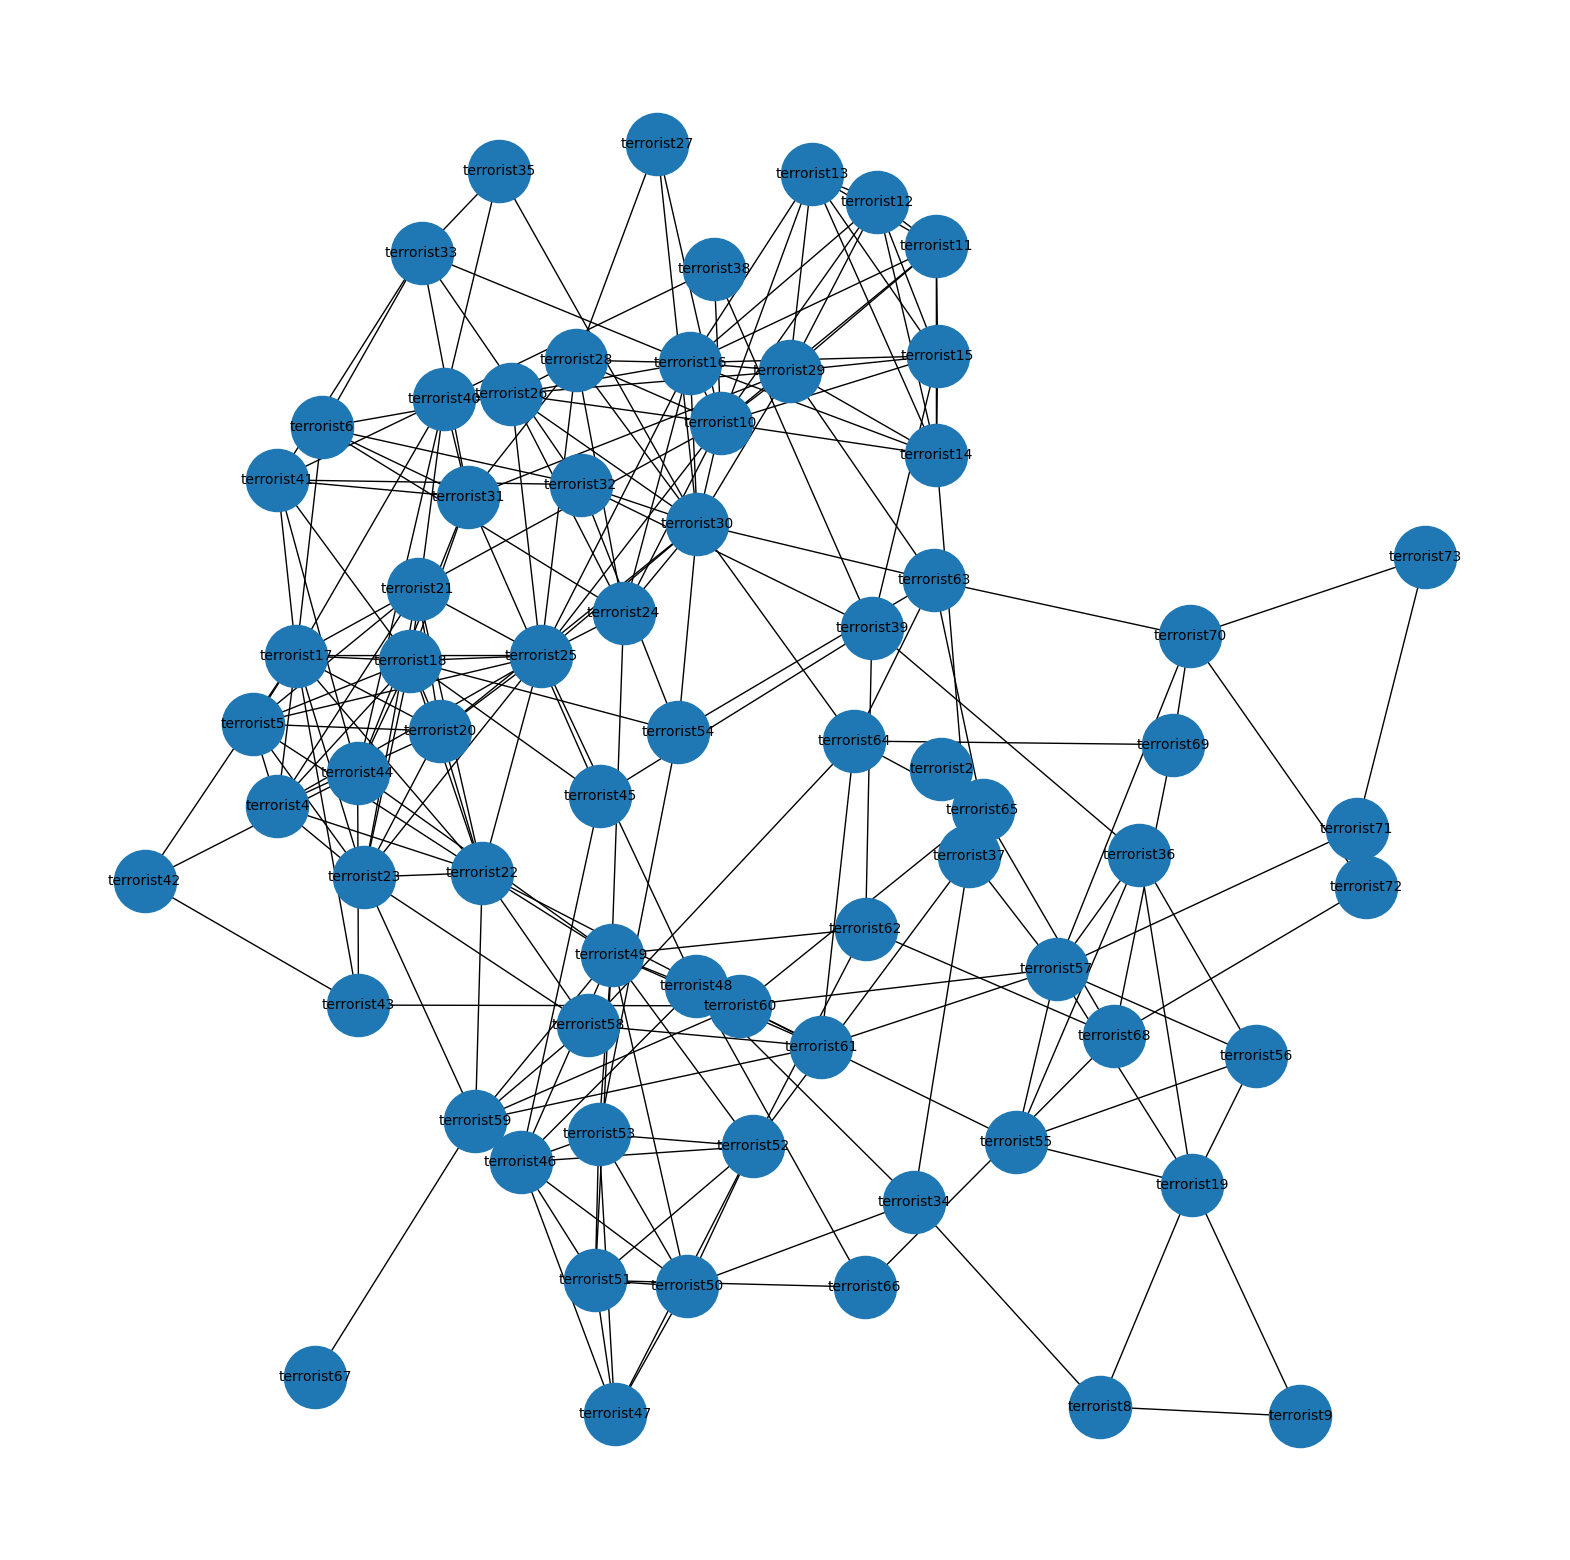

In [31]:
fig, ax = plt.subplots(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
#pos = nx.layo
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'), ax=ax, pos = pos, node_size=2000, font_size=10)

In [32]:
degree = G.degree()

degree_list = []

for (n,d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)

print('The average degree is ' + str(av_degree))

The average degree is 6.542857142857143


In [33]:
# nx.degree(G) - zwraca liste tupli (node, degree)
def TERRORISTS(G: nx.Graph, n: int) -> list:
  degrees = nx.degree(G)
  # bierze kazzdy element z listy i sortuje po drugim elemencie i odwraca
  degrees = sorted(degrees, key=lambda x: x[1], reverse=True)
  # degree[0] - index wierzcholka, degree[1] - stopien wierzcholka
  degrees = [(G.nodes[degree[0]]['label'],degree[1]) for degree in degrees]
  return degrees[:n] # [0:n] == [:n]
print(f"Terroryści z największą liczbą połączeń, szefowie gangów:")
TERRORISTS(G,5)

Terroryści z największą liczbą połączeń, szefowie gangów:


[('terrorist10', 15),
 ('terrorist25', 15),
 ('terrorist30', 14),
 ('terrorist16', 13),
 ('terrorist17', 13)]

# losowo łapać terroryste i sprawdzać jak wpłwa
# 

In [34]:
import random


ListOfNodes = G.nodes()
NumberOfNodes = G.number_of_nodes()

In [35]:
ListOfNodes

NodeView((2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73))

In [36]:
sample = 5
RandomSample = random.sample(ListOfNodes,sample)

C:\Users\Przemek\AppData\Local\Temp\ipykernel_12764\2094200911.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  RandomSample = random.sample(ListOfNodes,sample)


In [37]:
G.remove_nodes_from(RandomSample)

In [38]:
ListofNodes1 = G.nodes()
G.nodes()
G.number_of_nodes()

65

### po usunięciu randomowo 2 wierzchołków oraz specjalnie 1 - najbardziej połączonego terroryste

### Dorobić jeszcze losowo wybieranie terrorysty i usuwanie

### Dorobić jeszcze usunięcie 4 najbardziej połączonych terrorystów i zobaczyć jak wpływa